In [16]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [17]:
# Query to retrieve UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Offensive_Stats;
"""

usc_data = pd.read_sql(query, conn)

# Display the first few rows of the data
usc_data.head()

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_53346/1925936585.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  usc_data = pd.read_sql(query, conn)


,date,raw_location,opponent,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-11-26,H,Notre Dame,18,22,81.8,232,1,39,204,...,6,55,0,0,0,58.6,0.0,3.4,51.0,0.0
1,2022-12-02,N,Utah,28,41,68.3,363,3,27,56,...,4,39,1,1,2,56.5,0.0,25.9,609.9,228.0
2,2023-01-02,N,Tulane*,37,52,71.2,462,5,32,132,...,5,37,0,1,1,70.0,0.0,0.0,184.0,1223.0
3,2021-09-04,H,San Jose State,24,36,66.7,256,2,34,160,...,4,35,1,0,1,73.0,0.0,8.6,51.0,0.0
4,2021-09-11,H,Stanford,27,42,64.3,223,1,33,185,...,9,111,0,1,1,74.9,0.0,7.6,51.0,0.0


In [18]:


# Define distance ranges (you can adjust these as needed)
bins = [0, 400, 750, 1000, 1500, 4000]
labels = ['<400', '400-750', '750-1000', '1000-1500', '1500']

# Create a new column for distance categories
usc_data['Distance_Range'] = pd.cut(usc_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = usc_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',   # Include passing_att here
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()

# Display the grouped data
distance_grouped.head()


/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_53346/3639991777.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_grouped = usc_data.groupby('Distance_Range').agg({


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<400,300.938144,159.938144,460.876289,67.050515,2.402062,35.268041,35.865979,1.886598,23.824742,1.288660
1,400-750,268.538462,175.384615,443.923077,66.007692,2.153846,35.307692,34.307692,1.692308,21.461538,1.461538
2,750-1000,279.615385,166.461538,446.076923,63.361538,2.538462,33.846154,33.153846,1.461538,21.923077,1.307692
3,1000-1500,304.666667,63.666667,368.333333,60.766667,1.666667,26.000000,45.666667,1.000000,18.666667,1.000000
4,1500,277.666667,114.777778,392.444444,64.788889,1.444444,34.111111,37.888889,0.888889,21.333333,2.111111


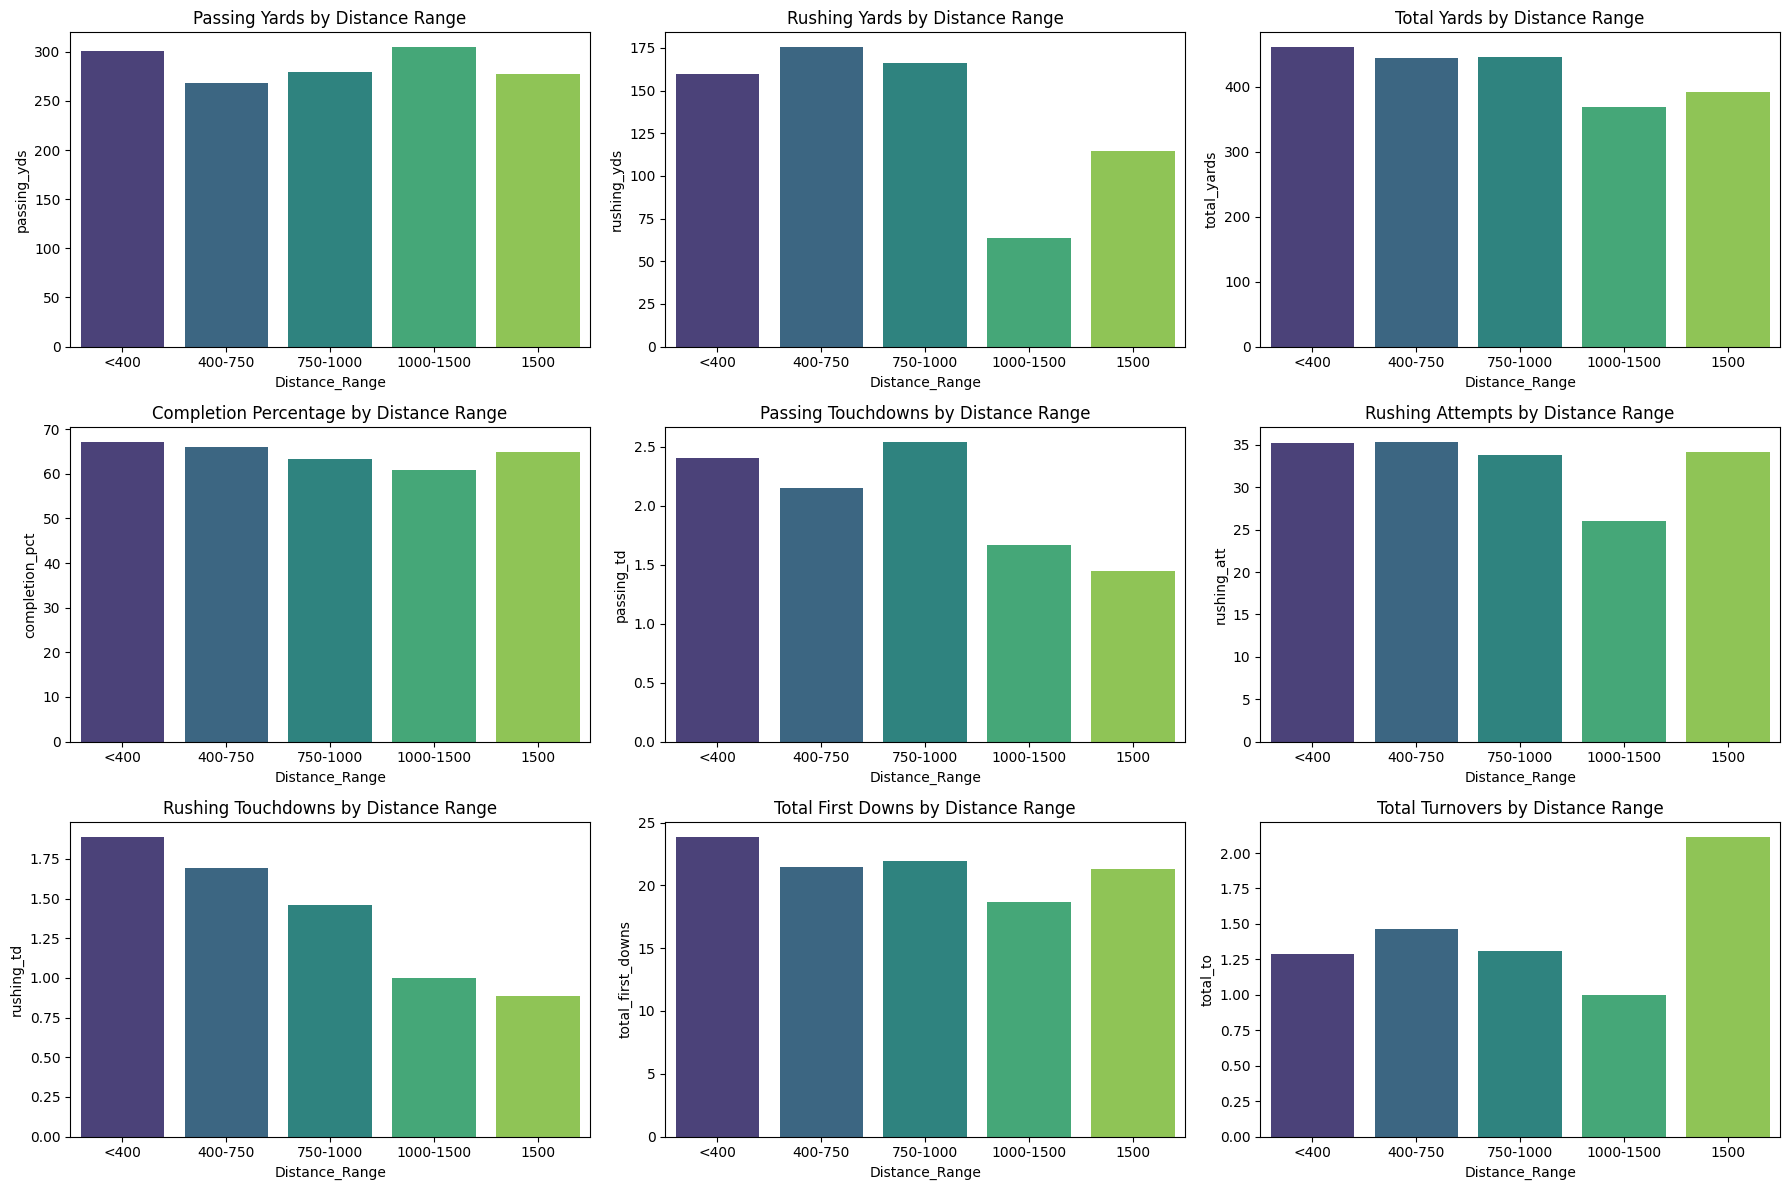

In [19]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')

# Adjust layout
plt.tight_layout()
plt.show()



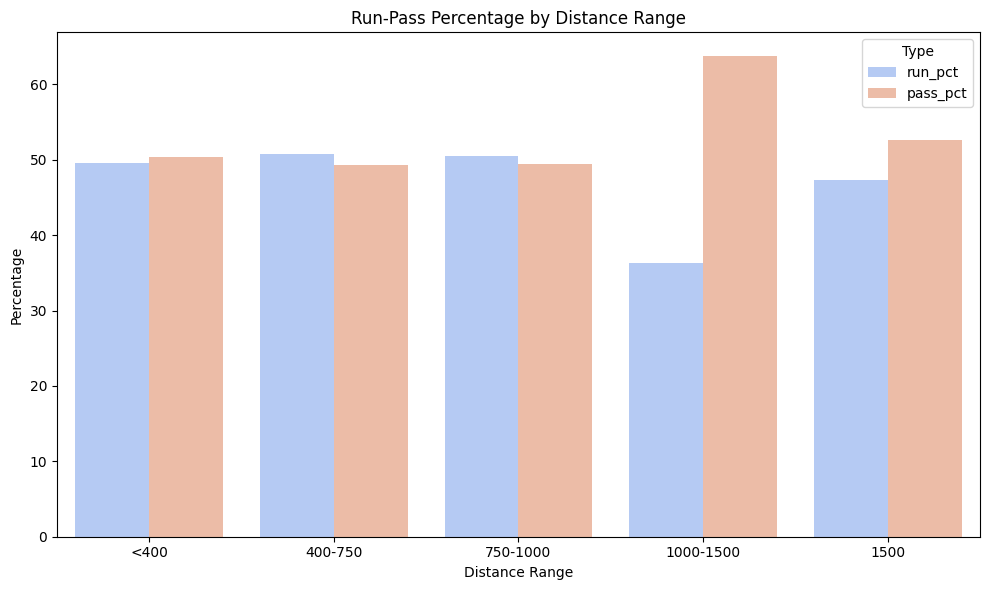

In [21]:
# Calculate Run-Pass Percentage
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# Add titles and labels
ax.set_title('Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

# Display the plot
plt.tight_layout()
plt.show()

Index(['date', 'raw_location', 'opponent', 'passing_cmp', 'passing_att',
       'completion_pct', 'passing_yds', 'passing_td', 'rushing_att',
       'rushing_yds', 'rushing_avg', 'rushing_td', 'total_plays',
       'total_yards', 'avg_yds', 'pass_first_downs', 'rush_first_downs',
       'first_down_pens', 'total_first_downs', 'total_penalties',
       'total_penalties_yds', 'total_fum', 'total_int', 'total_to', 'temp_f',
       'precipitation_in', 'windspeed_mph', 'altitude_m', 'distance_from',
       'Distance_Range'],
      dtype='object')
